# Lista de Exercícios 1

**Disciplina:** Aprendizado Profundo

**Professor:** Tiago Maritan

**Alunos:** Erlon Lacerda Avelino, Maria Eduarda Bandeira Hora

## Questão 1
Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo.

- **(a)** \( f(x) = \sin(2x) + \cos(3x) \), onde \( 0 \leq x \leq 5 \)
- **(b)** \( f(x) = \log_{10}(x) \), onde \( 1 \leq x \leq 10 \)
- **(c)** \( f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2 \), onde \( 0 \leq x \leq 5 \)

Para cada função a ser aproximada, gere um conjunto de treinamento e um conjunto de testes. Nesses conjuntos, cada amostra deve ser representada da seguinte forma: \( x \) é a entrada e \( f(x) \) é a saída desejada - rótulo.

Treine um perceptron de múltiplas camadas para que ele aprenda a aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de validação.

Apresente os gráficos das funções reais versus as funções aproximadas e as curvas de erro de treinamento e validação.

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [54]:
# a)
def f1(x):
  return np.sin(2*x) + np.cos(3*x)

X = np.linspace(0, 6, 1000) # mais pontos de 0 a 6
y = np.array([f1(x) for x in X])


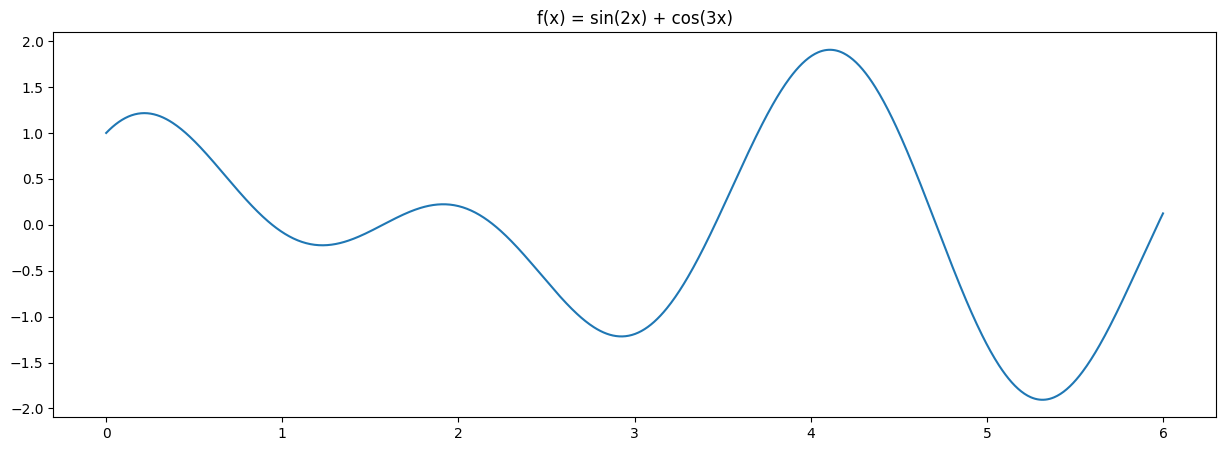

In [55]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = sin(2x) + cos(3x)')
plt.show()

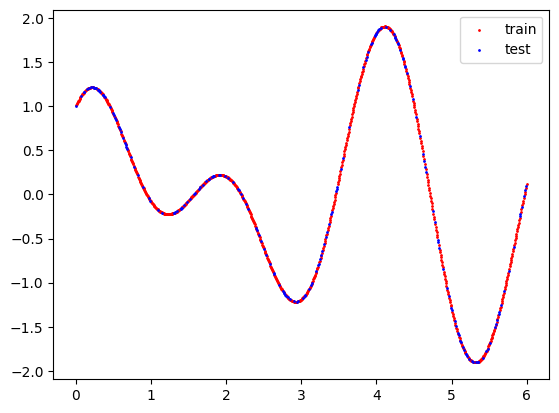

In [56]:
#separando em treino e teste, utilizando os conjuntos X e y que criei

def train_test_split_indices(X, y, train_size) -> tuple:
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    if not isinstance(X, np.ndarray):
        X = np.array(X)

    n = X.shape[0]
    n_train = math.floor(n * train_size)
    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)


plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])

In [57]:
# print(np.array_equal(np.sort(np.concatenate([X_train, X_test])), np.sort(X)))
# print(len(X_train) + len(X_test) == len(X))
# por que sequencial? Explicar
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='tanh'), # tanh porque foi melhor que relu, ficou mais curvado
    layers.Dense(64, activation='tanh'),
    layers.Dense(1) # saída numérica
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=200, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


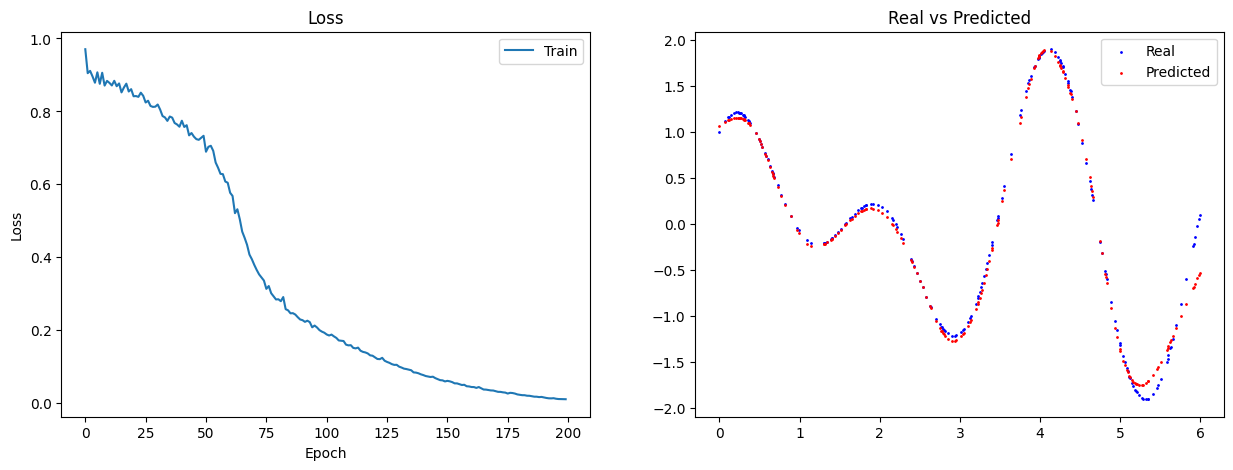

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 
Erro:  0.012603875249624252


In [ ]:
def plot_result(history):
    # plot loss and accuracy
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train'])

    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='blue', s=1)
    plt.scatter(X_test, y_pred, color='red', s=1)
    plt.legend(['Real', 'Predicted'])
    plt.title('Real vs Predicted')
    plt.show()

plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


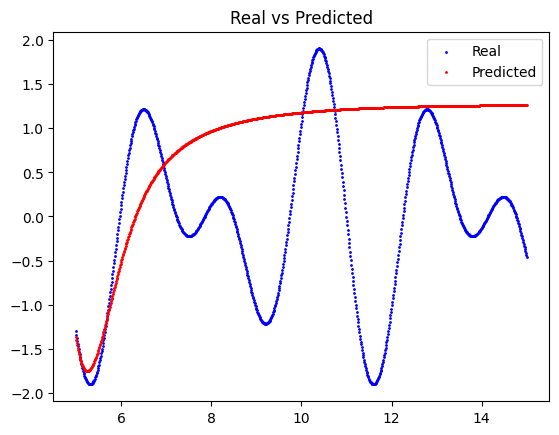

In [ ]:
# applying function to new data
# and comparing to real function


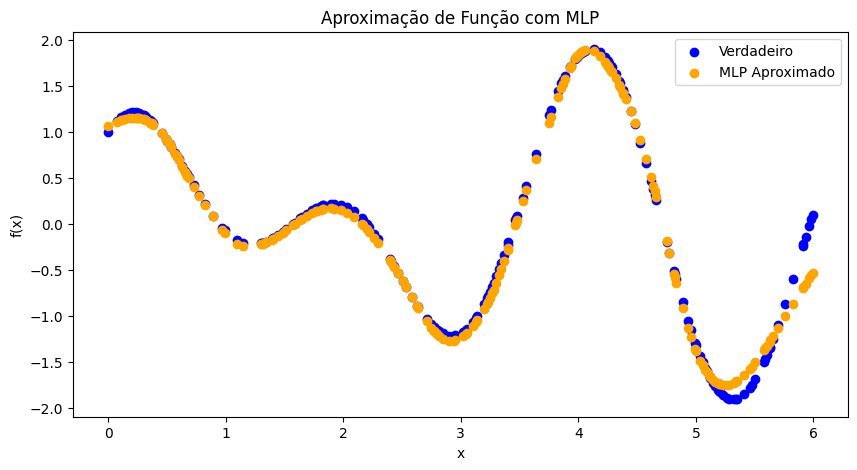

In [68]:
def plot_function_compare(X_test, y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, label="Verdadeiro", color="blue")
    plt.scatter(X_test, y_pred, label="MLP Aproximado", color="orange")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximação de Função com MLP")
    plt.show()

def plot_function_predict_compare(f, X, y, y_pred):
    x_max = X.max()
    new_X = np.linspace(int(x_max) - 3, int(x_max) + 6, 1000)
    new_y = np.array([f(x) for x in new_X])
    new_y_pred = model.predict(new_X)
    plt.figure(figsize=(10, 5))
    plt.scatter(new_X, new_y, label="Verdadeiro", color="blue")
    plt.scatter(new_X, new_y_pred, label="MLP Aproximado", color="orange")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximação de Função com MLP + Predição")
    plt.show()
plot_function_compare(X_test, y_test, y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


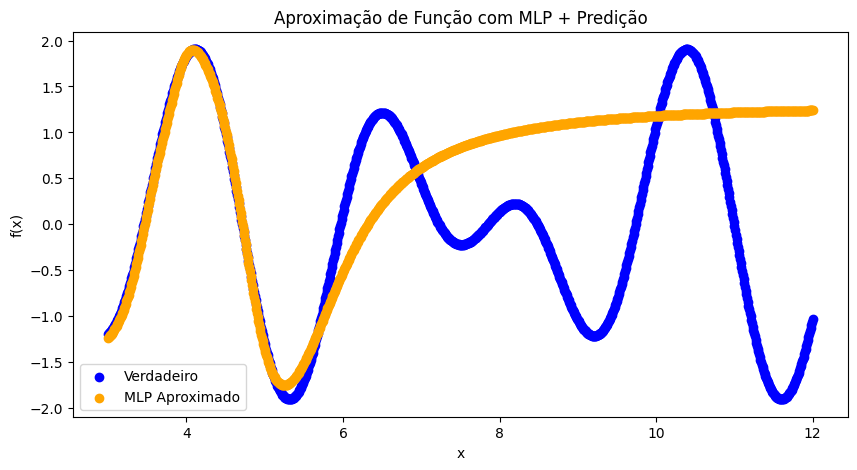

In [69]:
plot_function_predict_compare(f1, X, y, y_pred)

In [70]:
# b)

def f2(x):
    return np.log10(x)

X = np.linspace(1, 10, 1000)
y = [f2(x) for x in X]
y = np.array(y)

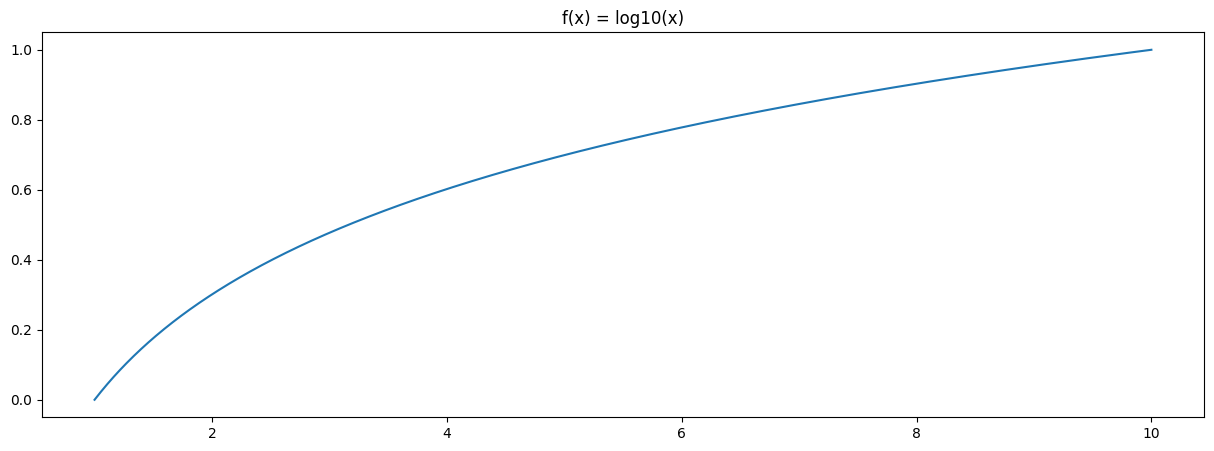

In [71]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = log10(x)')
plt.show()

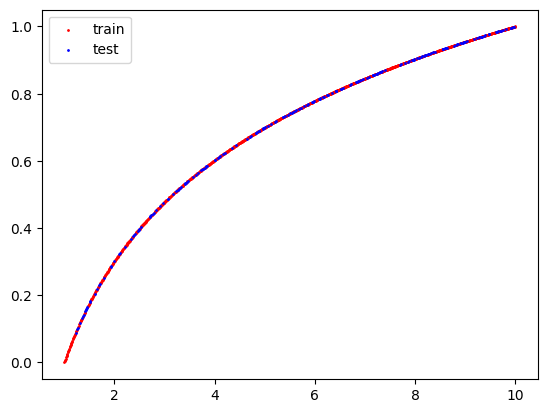

In [72]:
X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])
plt.show()

In [73]:
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=200, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


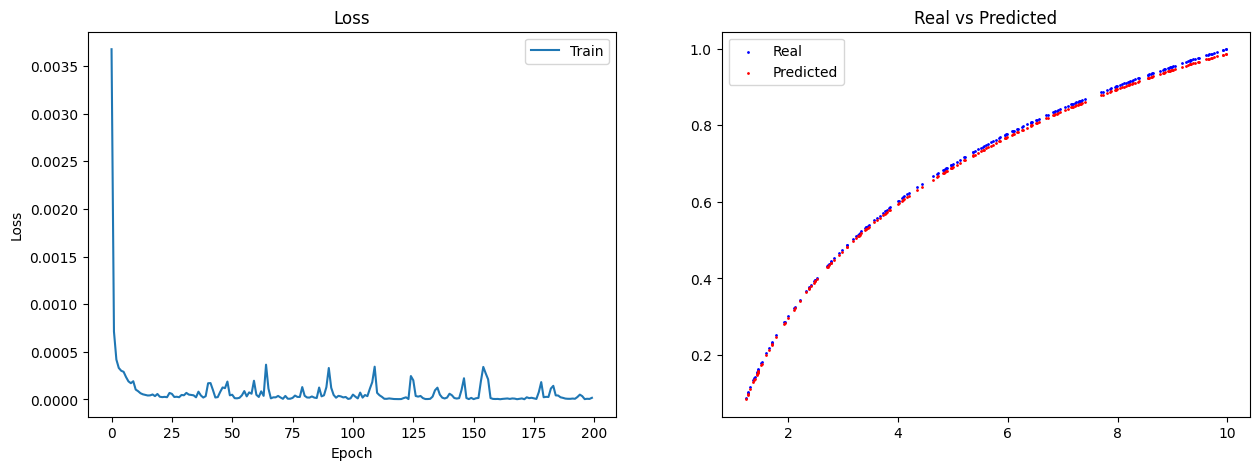

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0612e-05 
Erro:  5.789455462945625e-05


In [74]:
plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

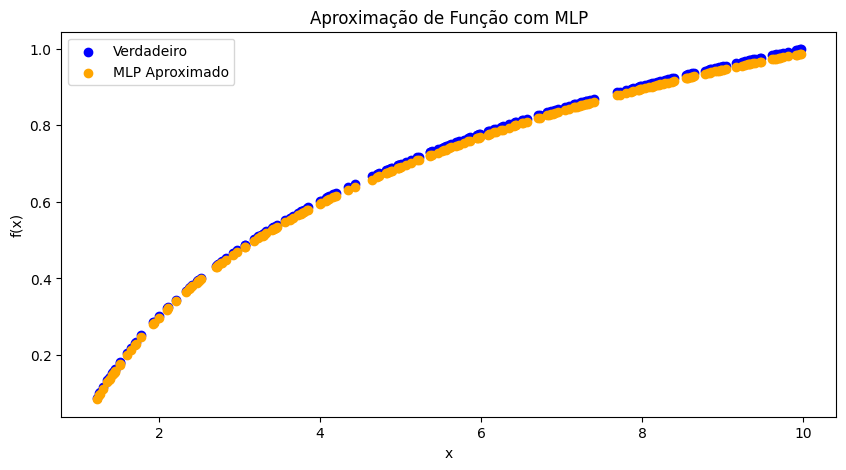

In [75]:
plot_function_compare(X_test, y_test, y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


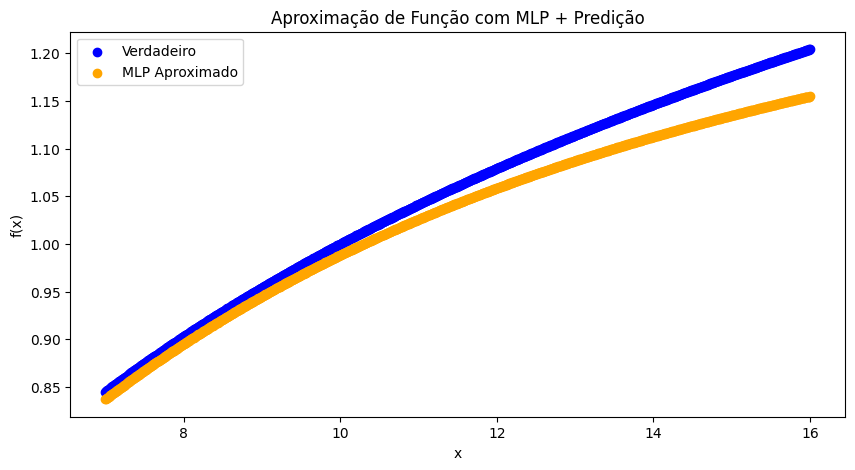

In [77]:
plot_function_predict_compare(f2, X, y, y_pred)

In [78]:
# c)

def f3(x):
    #10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2
    return 10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2

X = np.linspace(0, 5, 1000)
y = [f3(x) for x in X]
y = np.array(y)

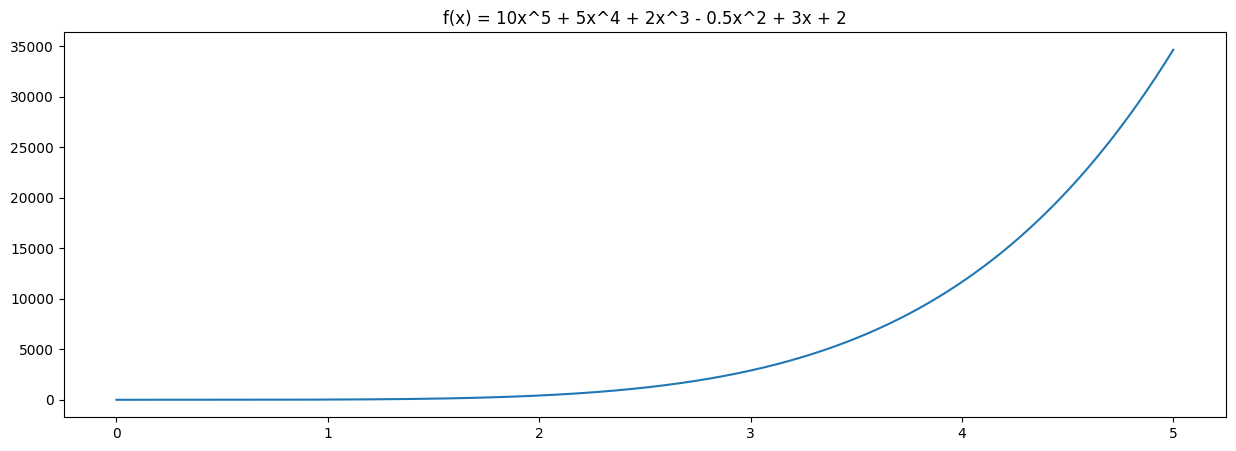

In [79]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.show()

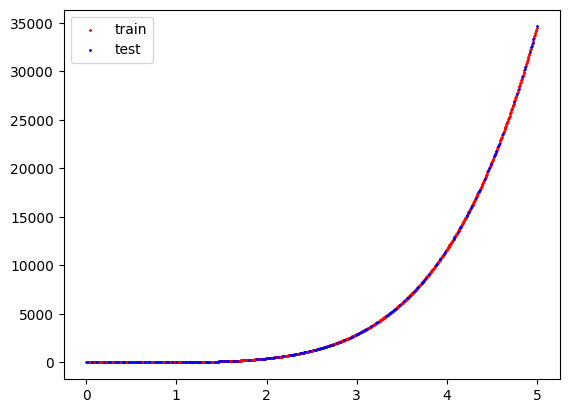

In [80]:
X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])
plt.show()

In [81]:
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=500, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


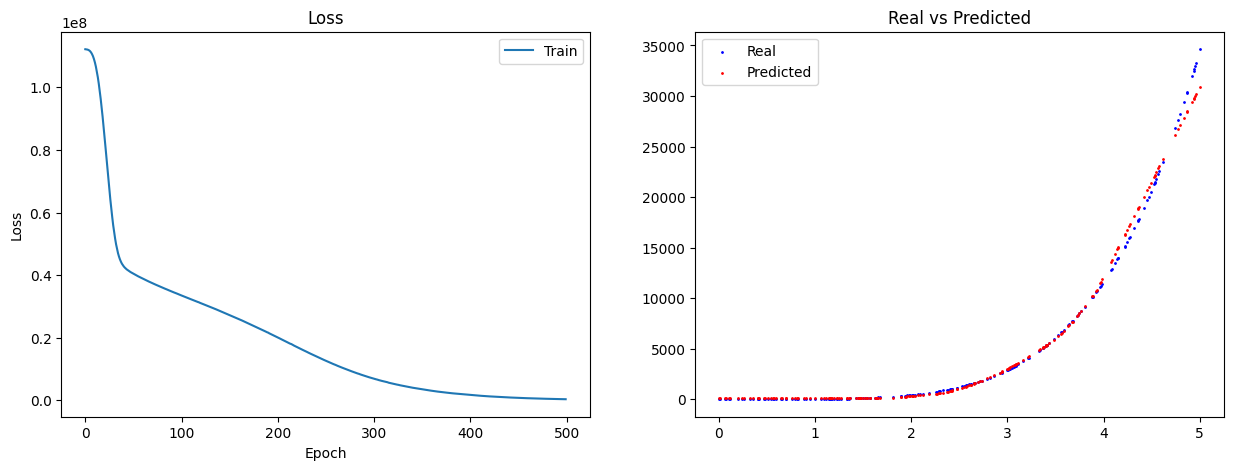

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 549415.1250 
Erro:  464934.4375


In [82]:
plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

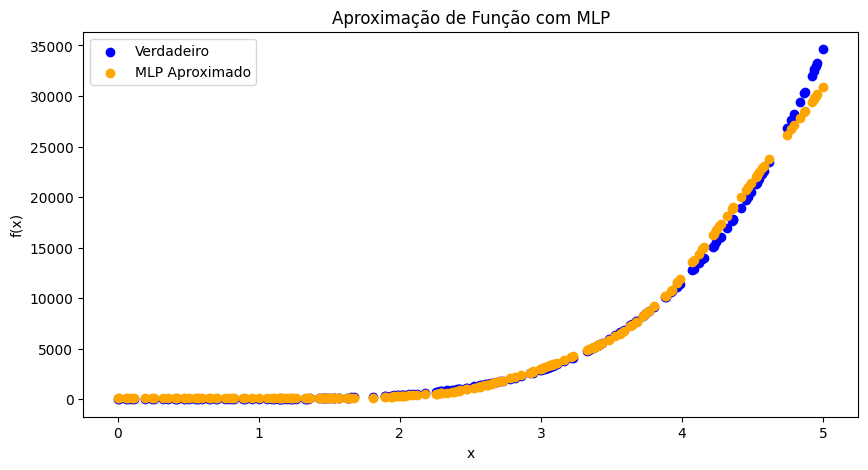

In [83]:
plot_function_compare(X_test, y_test, y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


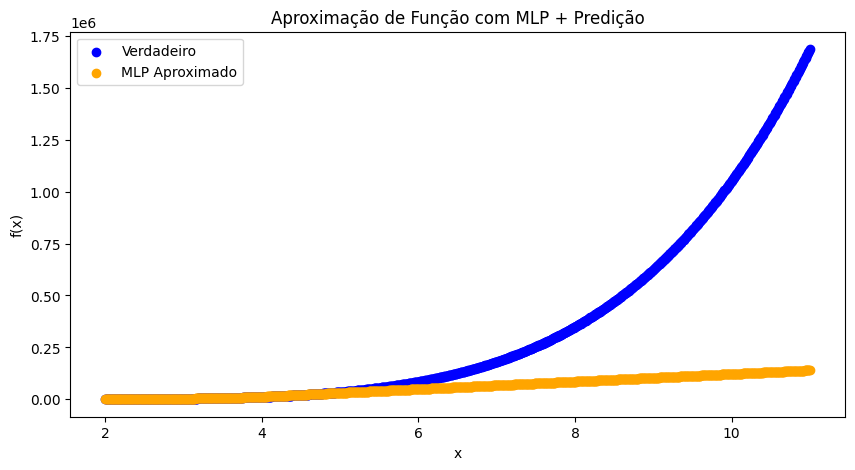

In [84]:
plot_function_predict_compare(f3, X, y, y_pred)

## Questão 2

Considere um problema de classificação de padrões constituído de oito padrões. A distribuição dos padrões forma um círculo centrado na origem de raio unitário e, contido no círculo, há um losango também centrado na origem e com lados iguais à raiz de 2.

Os dados das classes **C1**, **C2**, **C3**, **C4** correspondem aos quatro setores do losango, e as outras quatro classes correspondem aos setores delimitados pelo círculo e os lados do losango.

Após gerar aleatoriamente dados que venham a formar essas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. Treine duas redes perceptron (uma rede utilizando a regra delta convencional, e outra usando a regra delta com termo do momento) para classificar os padrões associados a cada uma das classes.

Verifique o desempenho dos classificadores usando o conjunto de validação e calculando a matriz de confusão.

**Dica**: Considere que os oito padrões estavam dispostos geometricamente da seguinte forma: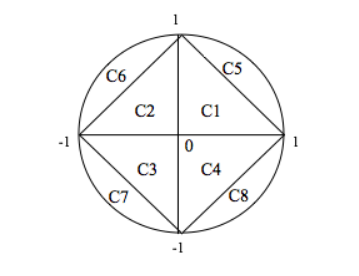

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
# equação da circunferência: x² + y² = r²

def gera_dados(num_dados):
  dados = []
  for _ in range(num_dados):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
      dados.append((x, y))
  return dados

In [ ]:
dados = gera_dados(10000)

for dado in dados[:5]:
  print(dado)

(0.5764979187288948, 0.16434320313908235)
(0.6599506919391596, -0.3953880029589194)
(-0.46116985275185285, -0.7437558510511697)
(0.13788723105081457, -0.25901081901447864)
(-0.5447420290614082, -0.7676676799456834)


In [ ]:
def classificar_ponto(x, y):
    if x > 0 and y > 0:
        if y < -x + 1:
            return 0  # C1
        else:
            return 4  # C5
    elif x < 0 and y > 0:
        if y < x + 1:
            return 1  # C2
        else:
            return 5  # C6
    elif x < 0 and y < 0:
        if y > -x - 1:
            return 2  # C3
        else:
            return 6  # C7
    elif x > 0 and y < 0:
        if y > x - 1:
            return 3  # C4
        else:
            return 7  # C8

In [ ]:
# transformar os dados em um dataframe
dataset = pd.DataFrame(dados, columns=['x', 'y'])
dataset.head()

,x,y
0,0.576498,0.164343
1,0.659951,-0.395388
2,-0.461170,-0.743756
3,0.137887,-0.259011
4,-0.544742,-0.767668


In [ ]:
# classificar os pontos
dataset['classe'] = dataset.apply(lambda row: classificar_ponto(row['x'], row['y']), axis=1)
dataset.head()

,x,y,classe
0,0.576498,0.164343,0
1,0.659951,-0.395388,7
2,-0.461170,-0.743756,6
3,0.137887,-0.259011,3
4,-0.544742,-0.767668,6


In [ ]:
dataset['classe'].value_counts()

,count
classe,
2,1292
0,1249
1,1230
3,1204
4,741
6,740
5,728
7,719


In [ ]:
# Convertendo os dados para tf.data.Dataset
def to_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(X))  # Embaralha os dados
    dataset = dataset.batch(batch_size)
    return dataset

X = dataset[['x', 'y']].values
y = dataset['classe'].values

# Dividindo os dados para treino e validação (80% treino, 20% validação)
train_size = int(0.8 * len(X))

# treino teste
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

train_size = int(0.8 * len(X_train))
# treino validação
X_train, X_val = X_train[:train_size], X_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]

# Convertendo os dados para tf.data.Dataset
train_ds = to_tf_dataset(X_train, y_train)
test_ds = to_tf_dataset(X_test, y_test)
val_ds = to_tf_dataset(X_val, y_val)

### Regra delta com termo do momento

In [ ]:
# Definindo o modelo Perceptron com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='softmax', input_shape=(2,))
])

# Compilando o modelo com o otimizador SGD (Gradiente Descendente Estocástico)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
epochs = 80
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Avaliando o modelo
loss, accuracy = model.evaluate(test_ds)
print(f'Acurácia: {accuracy}')

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4559 - loss: 1.6549 - val_accuracy: 0.6773 - val_loss: 1.1012
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7405 - loss: 1.0430 - val_accuracy: 0.8542 - val_loss: 0.9158
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.8933 - val_accuracy: 0.9084 - val_loss: 0.8206
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.8094 - val_accuracy: 0.8191 - val_loss: 0.7697
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8980 - loss: 0.7433 - val_accuracy: 0.9522 - val_loss: 0.7040
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.6995 - val_accuracy: 0.9633 - val_loss: 0.6660
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9419 - loss: 0.6661 - val_accuracy: 0.9211 - val_loss: 0.6398
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.6390 - val_accuracy: 0.9490 - val_

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


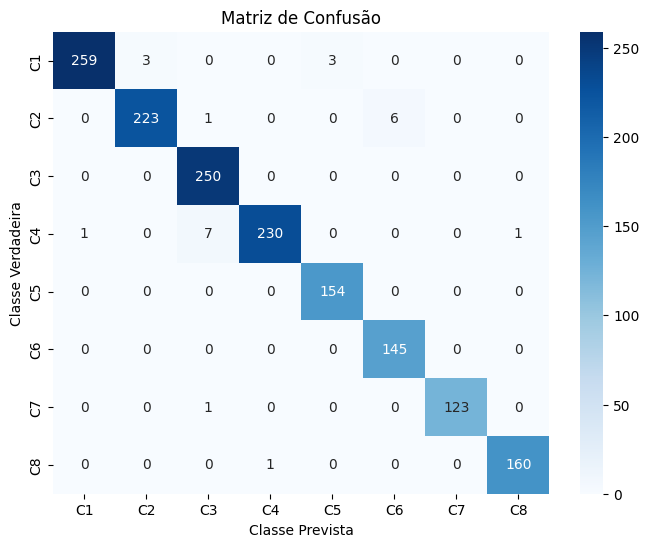

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])
plt.yticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

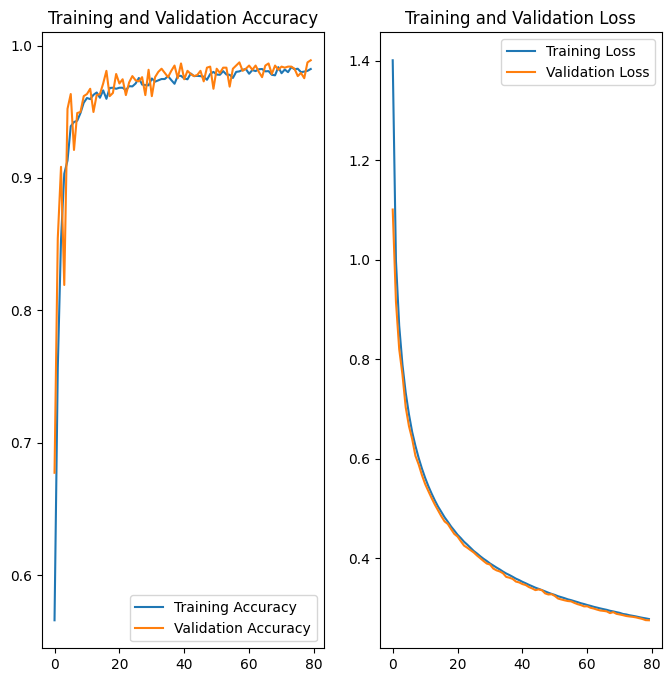

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Regra delta convencional

In [ ]:
# Compilando o modelo com o otimizador SGD (Gradiente Descendente Estocástico), com regra delta convencional
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
epochs = 80
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Avaliando o modelo
loss, accuracy = model.evaluate(test_ds)
print(f'Acurácia: {accuracy}')

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.2791 - val_accuracy: 0.9880 - val_loss: 0.2750
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.2742 - val_accuracy: 0.9857 - val_loss: 0.2747
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.2690 - val_accuracy: 0.9865 - val_loss: 0.2741
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.2776 - val_accuracy: 0.9841 - val_loss: 0.2742
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.2723 - val_accuracy: 0.9857 - val_loss: 0.2737
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.2807 - val_accuracy: 0.9817 - val_loss: 0.2737
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.2761 - val_accuracy: 0.9825 - val_loss: 0.2732
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.2794 - val_accuracy: 0.

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
np.unique(y_pred_classes)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([0, 1, 2, 3, 4, 5, 6, 7])

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


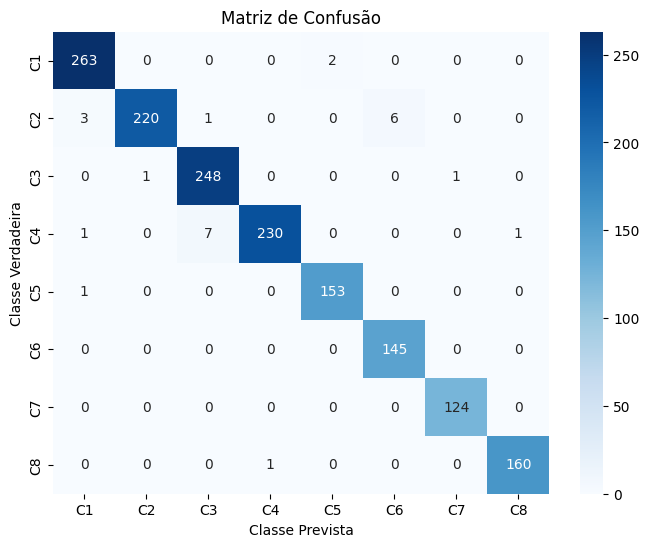

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)

# Exibindo a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])
plt.yticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

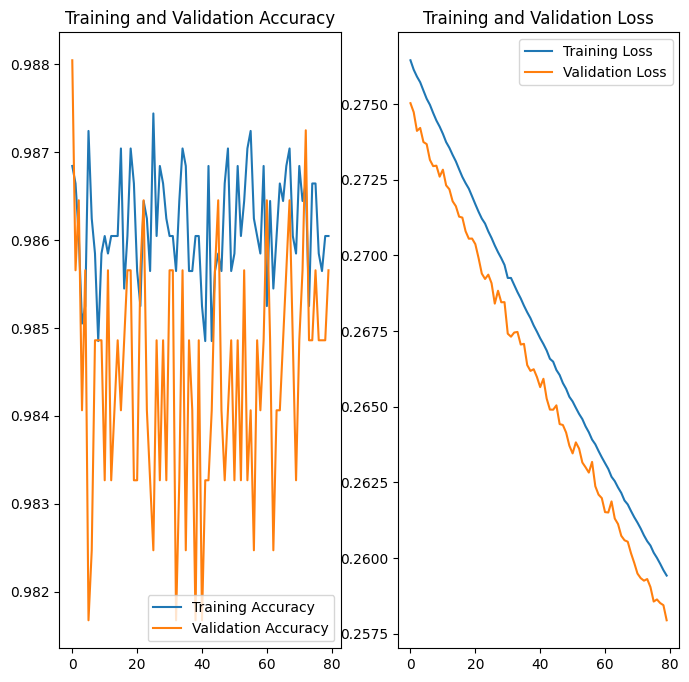

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Questão 3

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal:

$$
y(n) = 0.5y(n-1) + 0.2y(n-2) + 0.3\sin(n), \quad \text{para} \quad n \geq 0.
$$

Avalie o desempenho mostrando para cada caso os erros de predição.

Para fazer a predição, gere dois conjuntos de dados: um para o treinamento e outro para o teste. Nesse conjunto, cada amostra/exemplo pode ser construída utilizando como \( K \) números anteriores da série como atributos de entrada \( (y(n), y(n-1), y(n-2), ..., y(n-K)) \), e a saída desejada seriam os próximos números da série \( (y(n+1), y(n+2), y(n+3)) \).

**Por exemplo, para \( K = 10 \):**

- **Exemplo de treinamento 1:**
    - Entrada: \( y(0), y(1), y(2), ..., y(9) \)
    - Saída desejada: \( y(10), y(11) \) e \( y(12) \)

- **Exemplo de treinamento 2:**
    - Entrada: \( y(1), y(2), y(3), ..., y(10) \)
    - Saída desejada: \( y(11), y(12) \) e \( y(13) \)

- **Exemplo de treinamento n:**
    - Entrada: \( y(20), y(21), y(22), ..., y(29) \)
    - Saída desejada: \( y(30), y(31) \) e \( y(32) \)

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [99]:
import numpy as np

def serie_temporal(n):
  if n == 0 or n == 1:
    return 0.0
  # Inicializa a série até n
  y = np.zeros(n + 1)
  y[0], y[1] = 0.0, 0.0
  for i in range(2, n + 1):
    y[i] = 0.5 * y[i - 1] + 0.2 * y[i - 2] + 0.3 * np.sin(i)
  return y[n]

In [100]:
print(serie_temporal(10))

0.014737879485636957


In [101]:
# Parâmetros
k = 10      # Quantidade de valores históricos para cada linha
n_rows = 100  # Quantidade de linhas no dataset

data = []

for _ in range(n_rows):
    init = np.random.randint(50)  # Escolher um número aleatório para o índice inicial

    history = [serie_temporal(n) for n in range(init, init + k)]  # Gerar k valores históricos
    future = [serie_temporal(init + k + i) for i in range(3)]     # Obter os 3 próximos valores

    data.append(history + future)

# Criar DataFrame pandas com colunas x0 a x9 e y1 a y3
columns = [f'x{i}' for i in range(k)] + [f'y{i+1}' for i in range(3)]
df = pd.DataFrame(data, columns=columns)

# Exibir o DataFrame
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3
0,-0.172261,0.109926,0.291047,0.204581,-0.069977,-0.280198,-0.232807,0.028626,0.263740,0.256373,0.013298,-0.242003,-0.274807
1,0.287980,0.099719,-0.180964,-0.295834,-0.139147,0.145143,0.295739,0.174243,-0.107597,-0.290623,-0.206537,0.067375,0.279293
2,-0.061786,0.210501,0.287980,0.099719,-0.180964,-0.295834,-0.139147,0.145143,0.295739,0.174243,-0.107597,-0.290623,-0.206537
3,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,0.291047,0.204581,-0.069977,-0.280198,-0.232807,0.028626,0.263740
4,-0.213615,-0.288364,-0.097994,0.182469,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,0.291047,0.204581,-0.069977


In [102]:
# dividindo em treino e teste
X = df.drop(columns=['y1', 'y2', 'y3'])
y = df[['y1', 'y2', 'y3']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Modelo para predição de 3 passos
model = Sequential([
    Dense(16, activation='relu', input_shape=(k,)),
    Dense(8, activation='relu'),
    Dense(3)  # saída de 3 valores
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

# Treinar o modelo de 3 passos
history3 = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Avaliar o modelo de 3 passos
loss3, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss predição de 3 passos: {loss3:.4f}')
print(f'Acurácia de 3 passos: {accuracy:.4f}')

/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339 (1.32 KB)

 Trainable params: 339 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

Loss predição de 3 passos: 0.0001
Acurácia de 3 passos: 1.0000


In [108]:
# Exemplo de predição
idx = np.random.randint(0, X_test.shape[0])
# Access the row by positional index using .iloc[]
input_sample = X_test.iloc[idx].values.reshape(1, -1)
true_future = y_test.iloc[idx]

pred_3steps = model.predict(input_sample)

print("\nExemplo de predição:")
print("Valores históricos (input):", input_sample.flatten())
print("Valores reais dos 3 próximos passos:", true_future)
print("Predição 3 passos:", pred_3steps.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Exemplo de predição:
Valores históricos (input): [-0.18096386 -0.29583432 -0.13914677  0.14514333  0.295739    0.17424277
 -0.10759693 -0.29062342 -0.20653662  0.06737454]
Valores reais dos 3 próximos passos: y1    0.279293
y2    0.234393
y3   -0.026035
Name: 53, dtype: float64
Predição 3 passos: [ 0.27581513  0.23346034 -0.0188154 ]


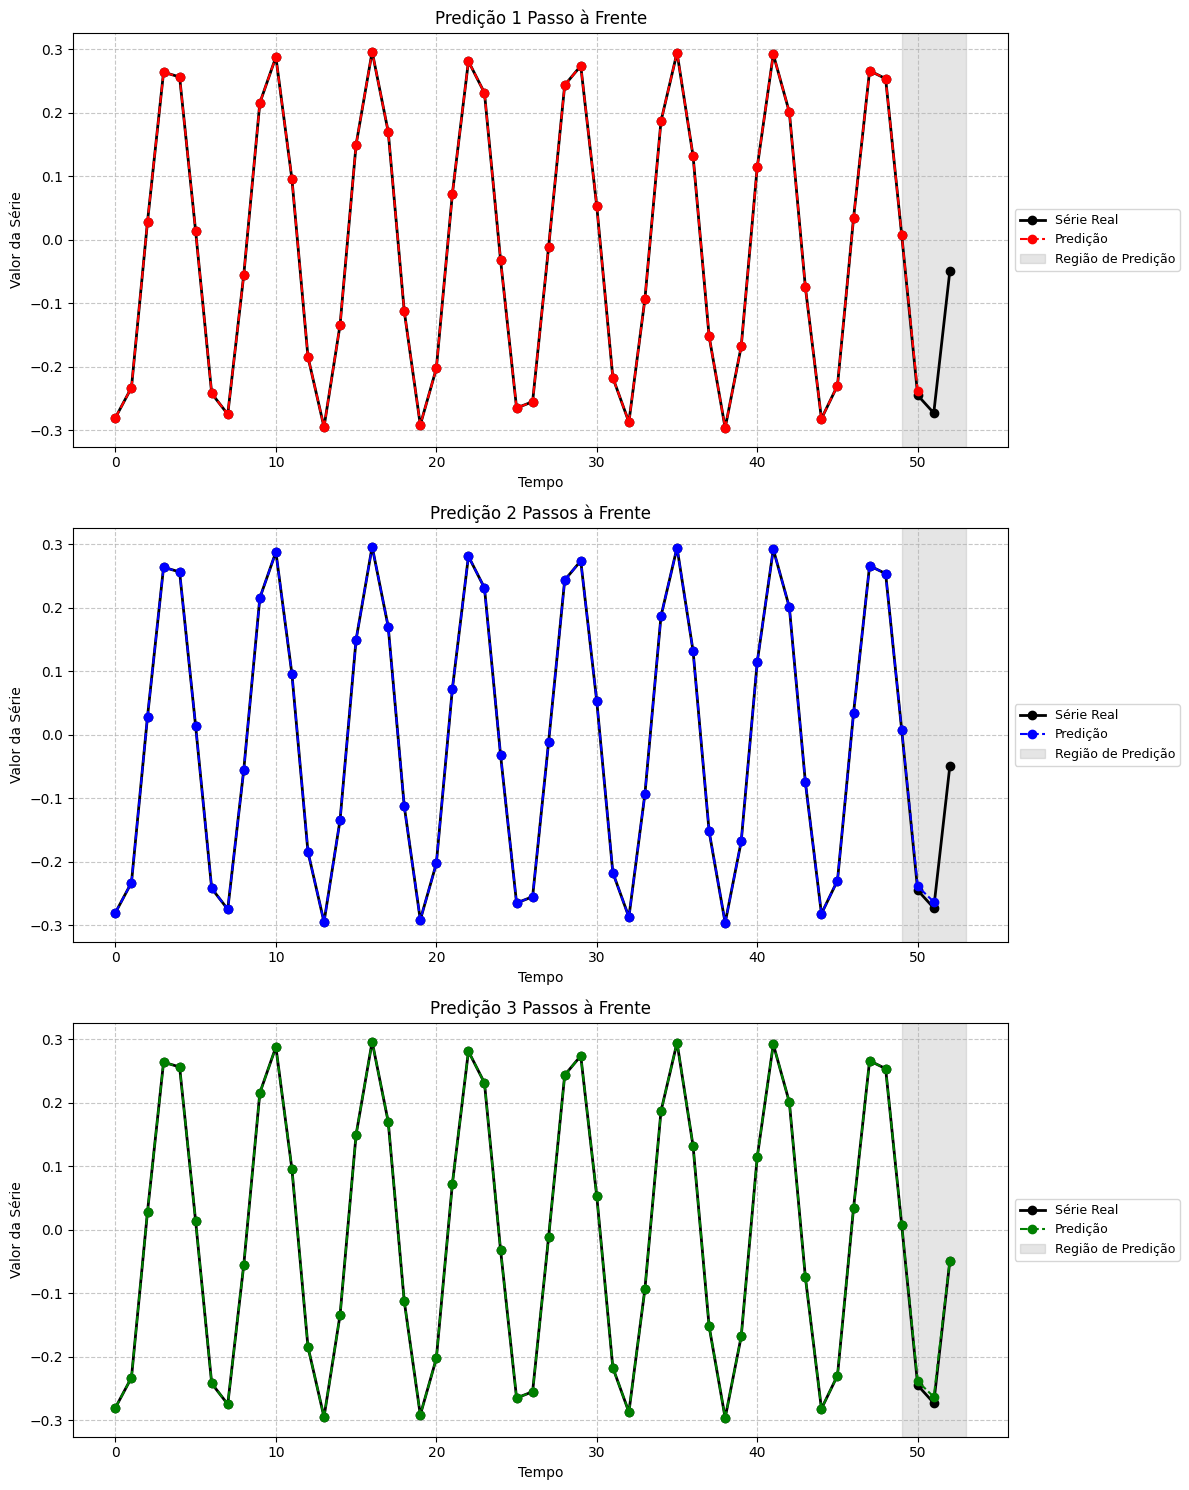

In [120]:
colors = ['red', 'blue', 'green']
colors_index = -1  # Iniciando com -1 para que o primeiro incremento resulte em 0

def plot_time_series_step(ax, serie_real, serie_pred, title):
    global colors, colors_index
    colors_index = (colors_index + 1) % len(colors)
    color = colors[colors_index]

    # Plotar a série real
    ax.plot(range(len(serie_real)), serie_real, 'ko-', label='Série Real', linewidth=2)
    # Plotar a predição - corrigido o formato da linha
    ax.plot(range(len(serie_pred)), serie_pred, color=color, linestyle='--', marker='o', 
            label=f'Predição', linewidth=1.5)
    # Preencher a região de predição
    ax.axvspan(len(serie_base)-1, len(serie_real), alpha=0.2, color='gray', label='Região de Predição')
    # Configurações do plot
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Tempo', fontsize=10)
    ax.set_ylabel('Valor da Série', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

# Criar figura com três subplots verticais
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Preparar séries para plotagem
serie_base = list(input_sample.flatten())
serie_real = serie_base + list(true_future)
serie_pred_1 = serie_base + [pred_3steps.flatten()[0]] + [None, None]
serie_pred_2 = serie_base + list(pred_3steps.flatten()[:2]) + [None]
serie_pred_3 = serie_base + list(pred_3steps.flatten())

# Plotar os três gráficos
plot_time_series_step(ax1, serie_real, serie_pred_1, 'Predição 1 Passo à Frente')
plot_time_series_step(ax2, serie_real, serie_pred_2, 'Predição 2 Passos à Frente')
plot_time_series_step(ax3, serie_real, serie_pred_3, 'Predição 3 Passos à Frente')

# Ajustar o layout
plt.tight_layout()
plt.show()

In [121]:
# Parâmetros
k = 50      # Quantidade de valores históricos para cada linha
n_rows = 100  # Quantidade de linhas no dataset

data = []

for _ in range(n_rows):
    init = np.random.randint(50)  # Escolher um número aleatório para o índice inicial

    history = [serie_temporal(n) for n in range(init, init + k)]  # Gerar k valores históricos
    future = [serie_temporal(init + k + i) for i in range(3)]     # Obter os 3 próximos valores

    data.append(history + future)

# Criar DataFrame pandas com colunas x0 a x9 e y1 a y3
columns = [f'x{i}' for i in range(k)] + [f'y{i+1}' for i in range(3)]
df = pd.DataFrame(data, columns=columns)

# Exibir o DataFrame
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x49,y1,y2,y3
0,0.174243,-0.107597,-0.290623,-0.206537,0.067375,0.279293,0.234393,-0.026035,-0.262548,-0.257693,...,0.296190,0.170119,-0.112359,-0.291534,-0.202674,0.072523,0.281043,0.231173,-0.031236,-0.264927
1,-0.290623,-0.206537,0.067375,0.279293,0.234393,-0.026035,-0.262548,-0.257693,-0.015928,0.240471,...,-0.112359,-0.291534,-0.202674,0.072523,0.281043,0.231173,-0.031236,-0.264927,-0.255045,-0.010676
2,-0.213615,-0.288364,-0.097994,0.182469,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,...,0.052374,-0.217217,-0.287100,-0.093025,0.186577,0.294641,0.131813,-0.152203,-0.296284,-0.167963
3,-0.172261,0.109926,0.291047,0.204581,-0.069977,-0.280198,-0.232807,0.028626,0.263740,0.256373,...,-0.296284,-0.167963,0.114782,0.291998,0.200752,-0.075065,-0.281867,-0.229522,0.033844,0.266094
4,-0.180964,-0.295834,-0.139147,0.145143,0.295739,0.174243,-0.107597,-0.290623,-0.206537,0.067375,...,0.095512,-0.184531,-0.294917,-0.134158,0.149945,0.296190,0.170119,-0.112359,-0.291534,-0.202674


In [122]:
# dividindo em treino e teste
X = df.drop(columns=['y1', 'y2', 'y3'])
y = df[['y1', 'y2', 'y3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Modelo para predição de 3 passos
model = Sequential([
    Dense(16, activation='relu', input_shape=(k,)),
    Dense(8, activation='relu'),
    Dense(3)  # saída de 3 valores
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

# Treinar o modelo de 3 passos
history3 = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Avaliar o modelo de 3 passos
loss3, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss predição de 3 passos: {loss3:.4f}')
print(f'Acurácia de 3 passos: {accuracy:.4f}')

/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 16)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 979 (3.82 KB)

 Trainable params: 979 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

Loss predição de 3 passos: 0.0001
Acurácia de 3 passos: 1.0000


In [124]:
# Exemplo de predição
idx = np.random.randint(0, X_test.shape[0])
# Access the row by positional index using .iloc[]
input_sample = X_test.iloc[idx].values.reshape(1, -1)
true_future = y_test.iloc[idx]

pred_3steps = model.predict(input_sample)

print("\nExemplo de predição:")
print("Valores históricos (input):", input_sample.flatten())
print("Valores reais dos 3 próximos passos:", true_future)
print("Predição 3 passos:", pred_3steps.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Exemplo de predição:
Valores históricos (input): [-0.28836374 -0.09799436  0.18246869  0.29516942  0.13649165 -0.14767676
 -0.29607247 -0.17226101  0.10992606  0.29104733  0.20458081 -0.06997652
 -0.2801979  -0.23280671  0.02862582  0.26373985  0.25637263  0.01329757
 -0.24200324 -0.27480741 -0.05495492  0.21542285  0.28774184  0.09551231
 -0.18453081 -0.29491715 -0.13415803  0.14994537  0.29618968  0.17011857
 -0.11235877 -0.29153398 -0.20267419  0.07252332  0.28104322  0.23117328
 -0.0312363  -0.26492737 -0.25504544 -0.0106759   0.24350901  0.27381286
  0.05237443 -0.21721681 -0.28709992 -0.09302469  0.18657701  0.29464067
  0.13181305 -0.15220288]
Valores reais dos 3 próximos passos: y1   -0.296284
y2   -0.167963
y3    0.114782
Name: 30, dtype: float64
Predição 3 passos: [-0.29246545 -0.17616612  0.11800478]


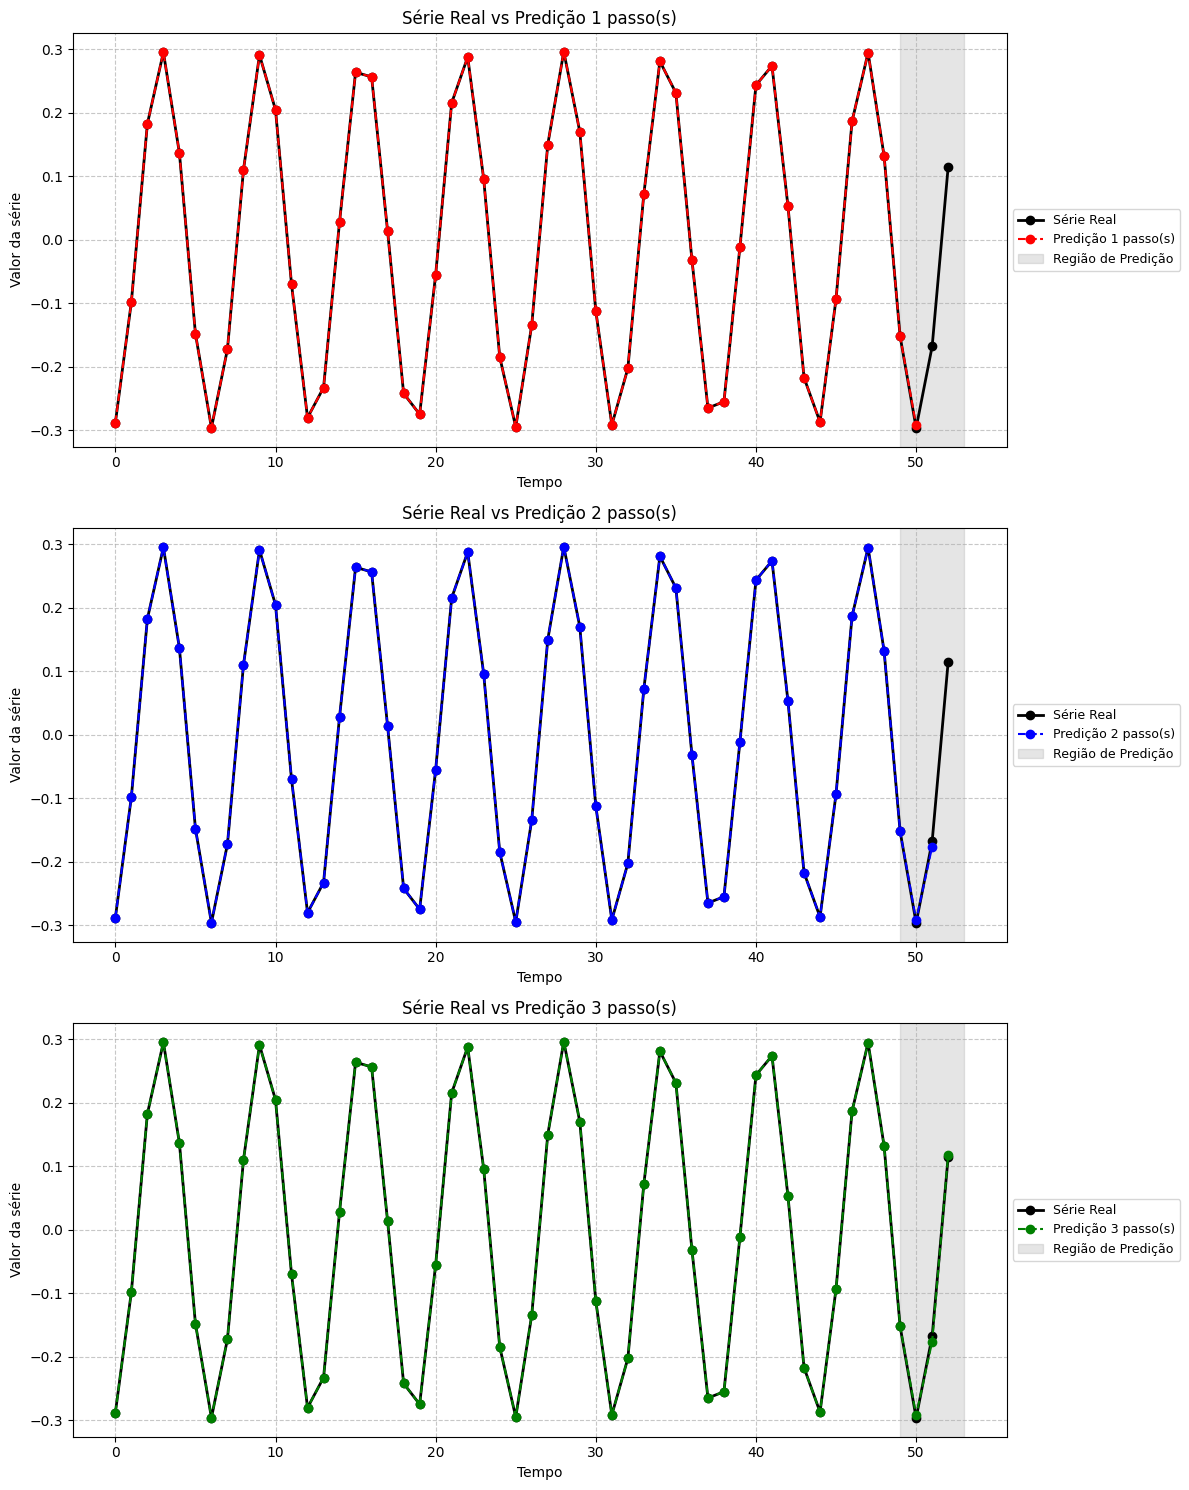

In [126]:
# Criar figura com três subplots verticais
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Preparar séries para plotagem
serie_base = list(input_sample.flatten())
serie_real = serie_base + list(true_future)

# Criar as séries preditas para 1, 2 e 3 passos
serie_pred_1 = serie_base + [pred_3steps.flatten()[0]] + [None, None]
serie_pred_2 = serie_base + list(pred_3steps.flatten()[:2]) + [None]
serie_pred_3 = serie_base + list(pred_3steps.flatten())

# Função para configurar cada subplot
def configurar_subplot(ax, serie_real, serie_pred, passos, cor):
    # Plotar série real e predita
    ax.plot(range(len(serie_real)), serie_real, 'ko-', label='Série Real', linewidth=2)
    ax.plot(range(len(serie_pred)), serie_pred, color=cor, linestyle='--', 
            marker='o', label=f'Predição {passos} passo(s)', linewidth=1.5)
    
    # Adicionar área sombreada
    ax.axvspan(len(serie_base)-1, len(serie_real), alpha=0.2, 
               color='gray', label='Região de Predição')
    
    # Configurações do plot
    ax.set_xlabel('Tempo', fontsize=10)
    ax.set_ylabel('Valor da série', fontsize=10)
    ax.set_title(f"Série Real vs Predição {passos} passo(s)", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

# Configurar cada subplot
configurar_subplot(ax1, serie_real, serie_pred_1, 1, 'red')
configurar_subplot(ax2, serie_real, serie_pred_2, 2, 'blue')
configurar_subplot(ax3, serie_real, serie_pred_3, 3, 'green')

# Ajustar o layout
plt.tight_layout()
plt.show()

## Questão 4
Implemente uma Rede Perceptron de Múltiplas Camadas que faça a classificação da
qualidade de vinhos, utilizando a base de dados Wine Quality Dataset, disponível em
https://archive.ics.uci.edu/dataset/186/wine+quality. Essa base contém informações sobre a
composição química de diferentes vinhos e sua respectiva qualidade. Aplique as técnicas de
pré-processamento de dados (tratamento de valores ausentes, seleção de atributos relevantes,
balanceamento, normalização, entre outros) vistas em salas de aula. Em seguida, divida os
dados em conjuntos de treinamento e de teste, e treine a rede neural para classificação da
qualidade do vinho. Compare o desempenho do modelo com e sem as técnicas de
pré-processamento aplicadas. Apresente também as curvas de erro de treinamento e
validação, e calcule a matriz de confusão.

In [1]:
# carregar os dados
# tratar valores ausentes
# seleção de atributos relevantes (correlação)
# balanceamento
# normalização
# treinamento, teste e validação
# testar com e sem pré-processamento
# calcular matriz de confusão

In [2]:
!pip install ucimlrepo
from IPython.display import clear_output
clear_output()
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

if "wine_quality" not in globals():
    wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

2025-03-11 07:20:30.964898: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 07:20:30.965495: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 07:20:30.967869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 07:20:30.974480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741688430.986221   49772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741688430.98

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(df.drop(columns=['quality']).equals(X)) # X se mantém o mesmo em df
print(df.drop(columns=[col for col in df.columns if col != 'quality']).equals(y)) # y se mantém o mesmo em df

True
True


In [6]:
print("Antes de remover valores ausentes: ", len(df))
df = df.dropna() # removendo valores ausentes
print("Após remover valores ausentes: ", len(df))

Antes de remover valores ausentes:  6497
Após remover valores ausentes:  6497


In [7]:
print(len(df))
df = df.drop_duplicates() # removendo duplicatas
print(len(df))

6497
5318


In [8]:
print(df['quality'].value_counts())

# removendo a classe minoritária
# para under sampling -> ficaram todas as classes com apenas 5 exemplos
# para over sampling -> deu erro pois tinham poucos exemplos da classe minoritária
df = df[df['quality'] != float(9)]

print(df['quality'].value_counts())

quality
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: count, dtype: int64
quality
6    2323
5    1751
7     855
4     206
8     148
3      30
Name: count, dtype: int64


In [9]:
# transformando de 3 a 8 para 0 a 5
# deu erro mais pra frente
df['quality'] = df['quality'] - 3

In [10]:
X = df.drop('quality', axis=1)
y = df.drop(X.columns, axis=1)

In [11]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000
mean,7.215330,0.344214,0.318458,5.050480,0.056728,30.027292,114.105966,0.994539,3.224561,0.533465,10.547687
std,1.320107,0.168330,0.147214,4.501491,0.036871,17.808630,56.807931,0.002964,0.160442,0.149787,1.185139
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5313 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5313 non-null   float64
 1   volatile_acidity      5313 non-null   float64
 2   citric_acid           5313 non-null   float64
 3   residual_sugar        5313 non-null   float64
 4   chlorides             5313 non-null   float64
 5   free_sulfur_dioxide   5313 non-null   float64
 6   total_sulfur_dioxide  5313 non-null   float64
 7   density               5313 non-null   float64
 8   pH                    5313 non-null   float64
 9   sulphates             5313 non-null   float64
 10  alcohol               5313 non-null   float64
dtypes: float64(11)
memory usage: 498.1 KB


In [13]:
y.value_counts(sort=False)

quality
0            30
1           206
2          1751
3          2323
4           855
5           148
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

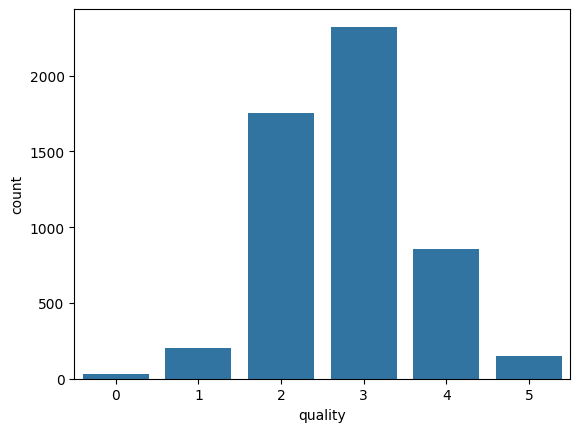

In [14]:
# distribuição de classes
sns.countplot(data=y, x='quality')

In [15]:
# normalização dos dados
# reescala dos dados
def normalize(X):
    return (X - X.min()) / (X.max() - X.min())

X = X.apply(normalize)

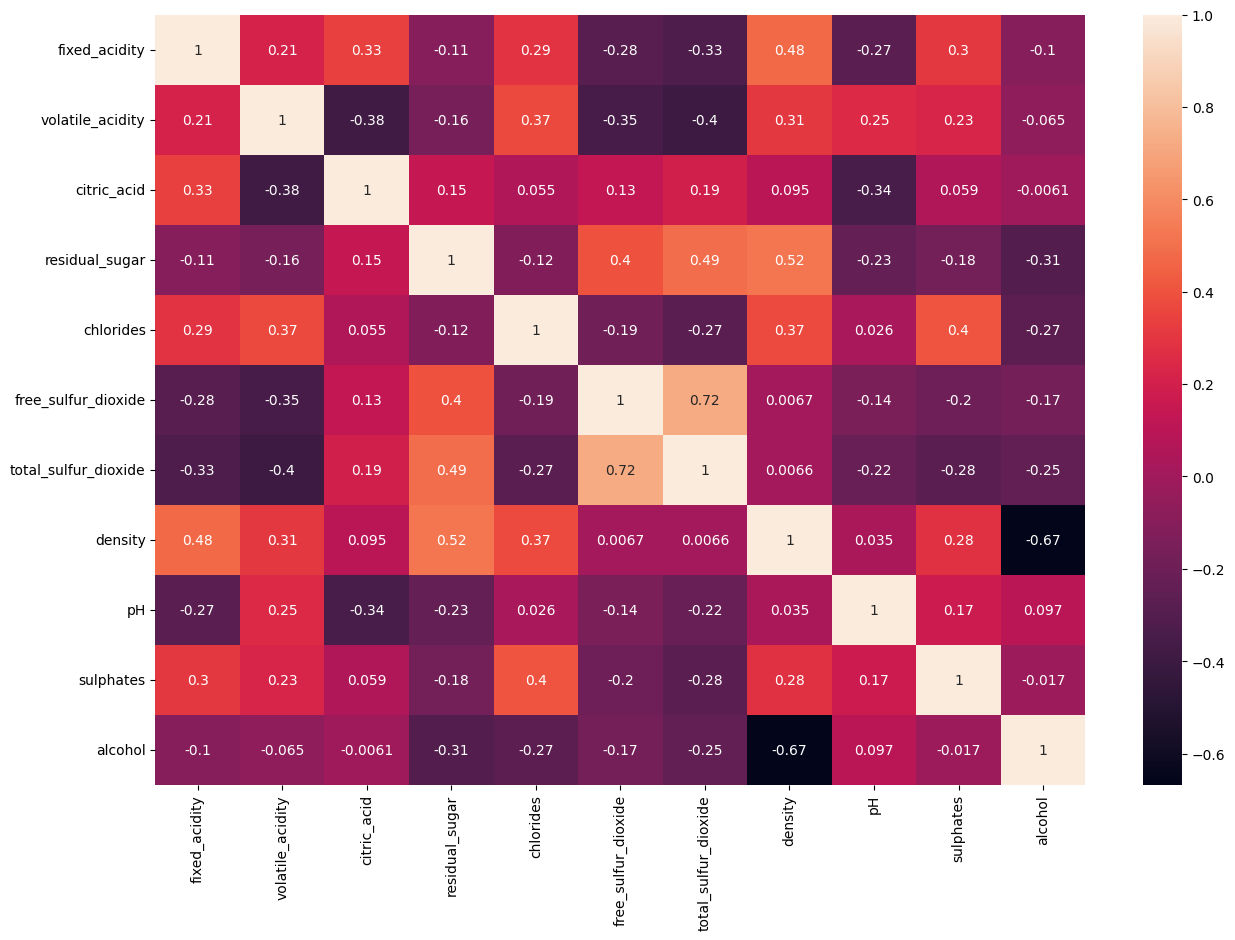

In [16]:
# variaveis importantes
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

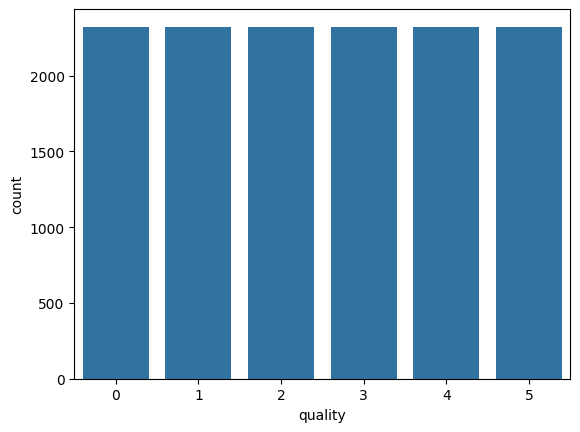

In [17]:
# balanceamento over sampling

smote = SMOTE()
X_rebalanced, y_rebalanced = smote.fit_resample(X, y)


sns.countplot(data=y_rebalanced, x='quality')

In [18]:
def train_test_split_indices(X, y, train_size) -> tuple:
    import math

    if not isinstance(y, np.ndarray):
        y = np.array(y)
    if not isinstance(X, np.ndarray):
        X = np.array(X)

    n = X.shape[0]
    n_train = math.floor(n * train_size)
    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test

In [19]:
def pre_process_dataset(df):
    df = df.dropna()
    df = df.drop_duplicates()

    df = df[df['quality'] != float(9)]

    X = df.drop('quality', axis=1)
    y = df.drop(X.columns, axis=1)

    X = X.apply(normalize)

    X_rebalanced, y_rebalanced = smote.fit_resample(X, y)
    return X_rebalanced, y_rebalanced

In [20]:
X_rebalanced, y_rebalanced = pre_process_dataset(df)

In [21]:
# separar em treino, teste e validação

X_train, y_train, X_test, y_test = train_test_split_indices(X_rebalanced, y_rebalanced, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(8920, 11) (8920, 1)
(2788, 11) (2788, 1)
(2230, 11) (2230, 1)


In [23]:
# multi layer perceptron multiclasse
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping], batch_size=32)

y_pred = model.predict(X_test)

Epoch 1/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2213 - loss: 1.7616 - val_accuracy: 0.3188 - val_loss: 1.5511
Epoch 2/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3362 - loss: 1.5149 - val_accuracy: 0.3776 - val_loss: 1.4662
Epoch 3/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3800 - loss: 1.4599 - val_accuracy: 0.3928 - val_loss: 1.4304
Epoch 4/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4030 - loss: 1.4235 - val_accuracy: 0.4004 - val_loss: 1.4022
Epoch 5/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4166 - loss: 1.3833 - val_accuracy: 0.4152 - val_loss: 1.3768
Epoch 6/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4431 - loss: 1.3529 - val_accuracy: 0.4018 - val_loss: 1.3570
Epoch 7/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4363 - loss: 1.3295 - val_accuracy: 0.4332 - val_loss: 1.3259
Epoch 8/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4567 - loss: 1.3097 - val_accu

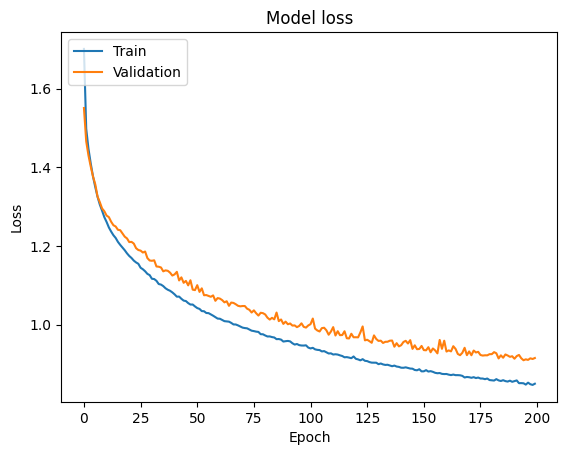

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.8837
Erro:  [0.8804450035095215, 0.6395265460014343]


In [24]:
# plot history with validation

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

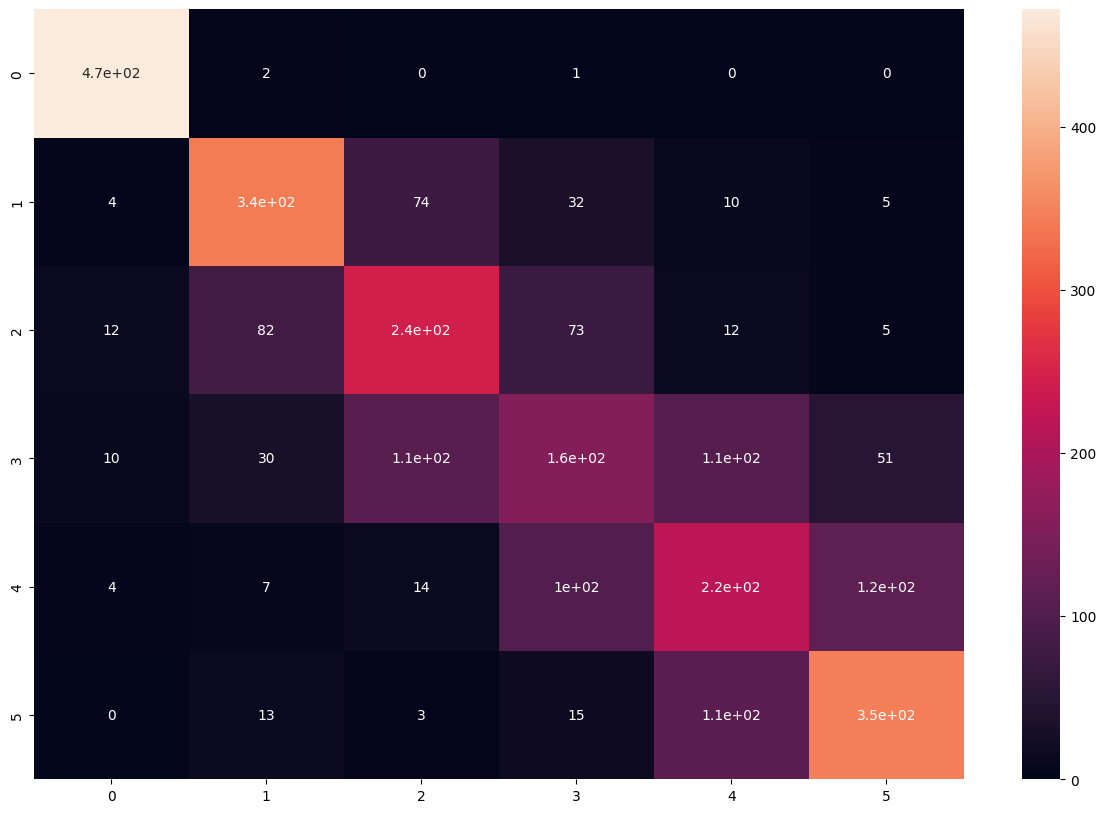

In [25]:
# plottar matriz de confusão
from sklearn.metrics import confusion_matrix

y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

In [26]:
# testando sem pré-processamento

X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)


Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4768 - loss: 1.4011 - val_accuracy: 0.5094 - val_loss: 1.2218
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 1.1803 - val_accuracy: 0.5094 - val_loss: 1.1604
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 1.1417 - val_accuracy: 0.4965 - val_loss: 1.1329
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5373 - loss: 1.1095 - val_accuracy: 0.5106 - val_loss: 1.1208
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5427 - loss: 1.1124 - val_accuracy: 0.5094 - val_loss: 1.1080
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5313 - loss: 1.1052 - val_accuracy: 0.5141 - val_loss: 1.1044
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5396 - loss: 1.0909 - val_accuracy: 0.5176 - val_loss: 1.0930
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5335 - loss: 1.1015 - val_accu

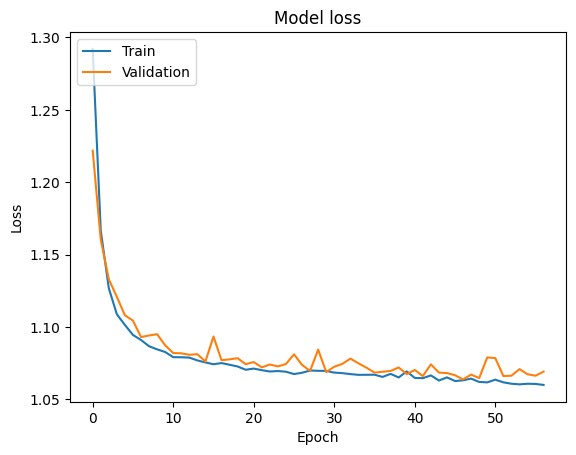

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5389 - loss: 1.0847 
Erro:  [1.0639163255691528, 0.5503292679786682]


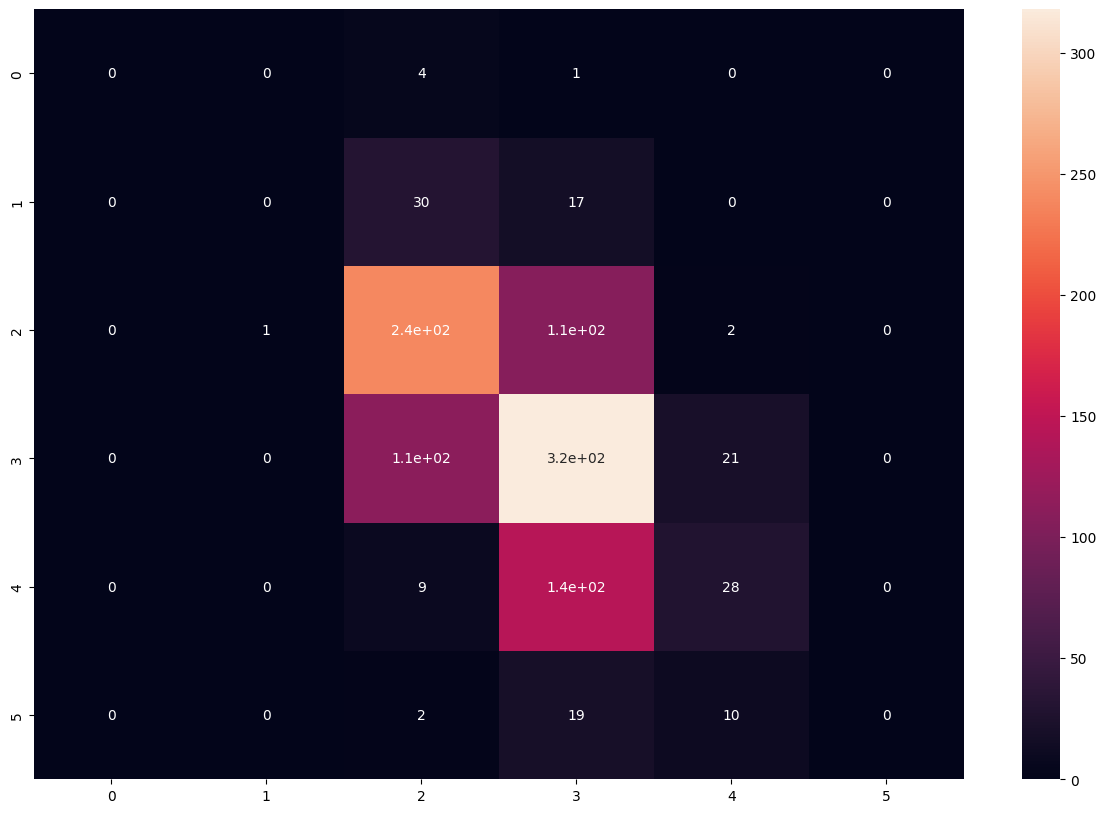

In [27]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

### Teste com apenas 2 classes

In [28]:
## ----------------------------------------------------


# ESSA PARTE NÃO É PEDIDA NA LISTA
#
#


## ----------------------------------------------------
# testando com apenas 2 classes (separando no meio)

In [29]:
new_df = df.copy()
new_df['quality'] = new_df['quality'].apply(lambda x: 1 if x > 2 else 0)

new_X = new_df.drop('quality', axis=1)
new_y = new_df.drop(new_X.columns, axis=1)

In [30]:
print(new_df['quality'].value_counts(normalize=True))

quality
1    0.626012
0    0.373988
Name: proportion, dtype: float64


In [31]:
new_X = new_X.apply(normalize)

In [32]:
X_train, y_train, X_test, y_test = train_test_split_indices(new_X, new_y, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

In [37]:
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6190 - loss: 0.6572 - val_accuracy: 0.6859 - val_loss: 0.5900
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.5655 - val_accuracy: 0.7106 - val_loss: 0.5465
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7313 - loss: 0.5347 - val_accuracy: 0.7212 - val_loss: 0.5409
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.5227 - val_accuracy: 0.7212 - val_loss: 0.5413
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7533 - loss: 0.5198 - val_accuracy: 0.7106 - val_loss: 0.5366
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7549 - loss: 0.5228 - val_accuracy: 0.7224 - val_loss: 0.5404
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7430 - loss: 0.5093 - val_accuracy: 0.7118 - val_loss: 0.5361
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7366 - loss: 0.5330 - val_accu

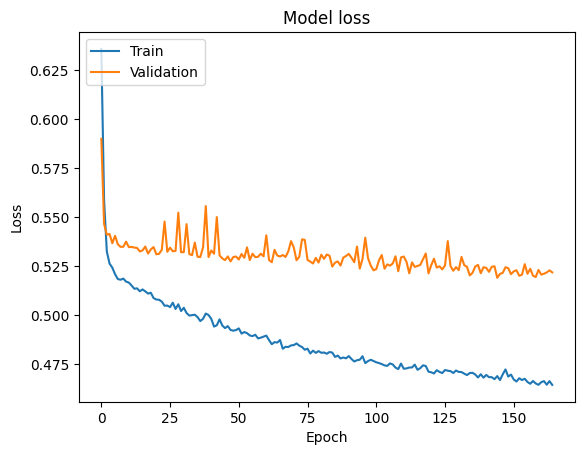

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7360 - loss: 0.5163 
Erro:  [0.47570309042930603, 0.7704609632492065]


In [38]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

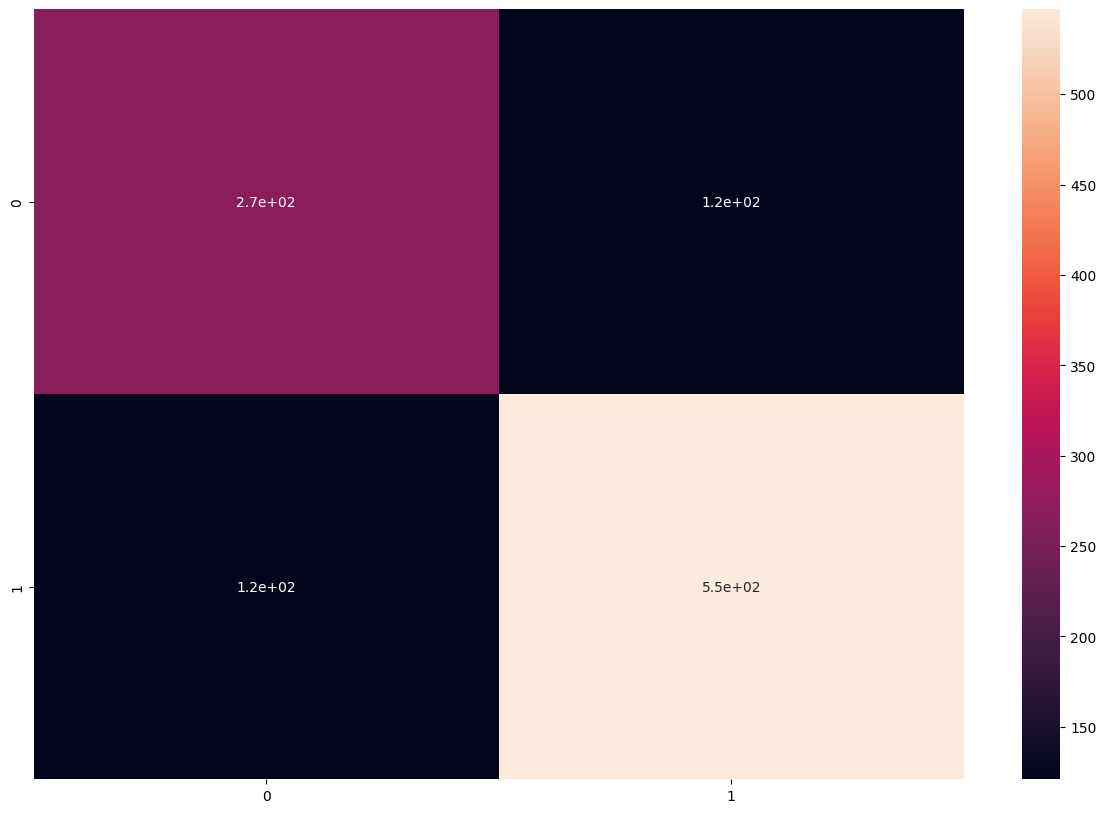

In [39]:
y_pred_ = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred_)

ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

### Teste com 3 classes

In [40]:
## ----------------------------------------------------


# ESSA PARTE NÃO É PEDIDA NA LISTA
#
#


## ----------------------------------------------------
# testando com 3 classes

In [44]:
new_df = df.copy()

# classes go from 0 to 5
mapToApply = {
    0: 0,
    1: 0,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
}
new_df['quality'] = new_df['quality'].apply(lambda x: mapToApply[x])

new_X = new_df.drop('quality', axis=1)

new_y = new_df.drop(new_X.columns, axis=1)

# distribuição de classes
print(new_y['quality'].value_counts(normalize=True))

quality
1    0.766798
2    0.188782
0    0.044419
Name: proportion, dtype: float64


In [45]:
new_X = new_X.apply(normalize)

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
new_X_rebalanced, new_y_rebalanced = smote.fit_resample(new_X, new_y)

print(new_y_rebalanced['quality'].value_counts(normalize=True))


quality
1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64


In [47]:
print(len(new_X), len(new_y))
print(len(new_X_rebalanced), len(new_y_rebalanced))

5313 5313
12222 12222


In [48]:
X_train, y_train, X_test, y_test = train_test_split_indices(new_X_rebalanced, new_y_rebalanced, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

In [49]:
X_train.shape, y_train.shape

((7821, 11), (7821, 1))

In [50]:
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

Epoch 1/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4757 - loss: 1.0243 - val_accuracy: 0.5777 - val_loss: 0.8786
Epoch 2/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5833 - loss: 0.8730 - val_accuracy: 0.6135 - val_loss: 0.8301
Epoch 3/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6116 - loss: 0.8378 - val_accuracy: 0.6217 - val_loss: 0.8166
Epoch 4/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6153 - loss: 0.8222 - val_accuracy: 0.6293 - val_loss: 0.8148
Epoch 5/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6095 - loss: 0.8241 - val_accuracy: 0.6304 - val_loss: 0.8145
Epoch 6/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6240 - loss: 0.8212 - val_accuracy: 0.6442 - val_loss: 0.8122
Epoch 7/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6166 - loss: 0.8206 - val_accuracy: 0.6339 - val_loss: 0.8063
Epoch 8/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6225 - loss: 0.8189 - val_accu

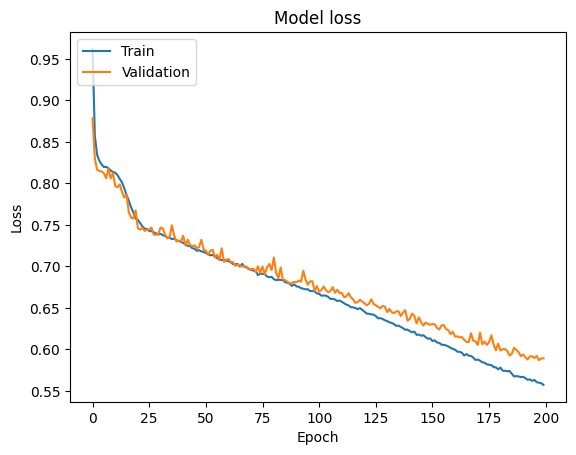

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7383 - loss: 0.5867
Erro:  [0.5874817967414856, 0.7415133118629456]


In [51]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

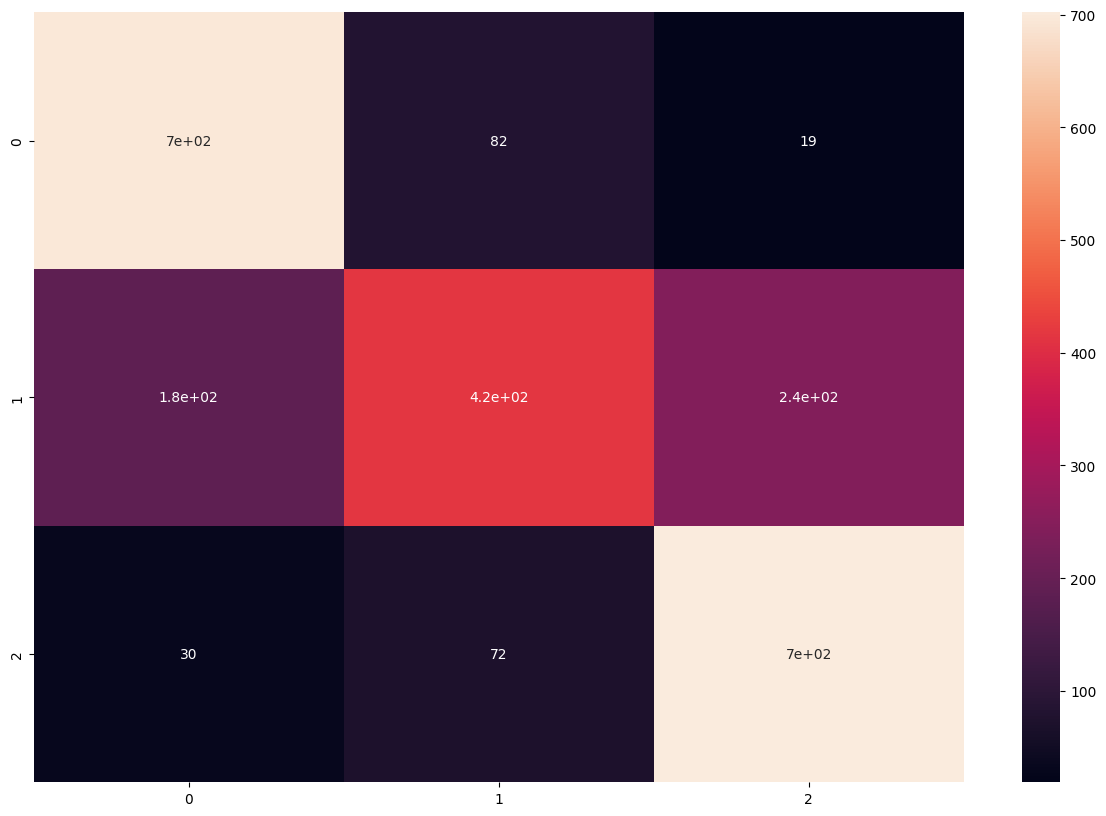

In [52]:
y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)

ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()